In [1]:
!pip install twstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.1/626.1 kB 4.0 MB/s eta 0:00:00


In [3]:
import twstock
stock = twstock.Stock('2330')
print(stock)

In [4]:
# Stock 預設建立時會取得近 31 日開盤之資料
print('high', stock.date[-5:])    # 近五日
print('price', stock.price[-5:])  # 近五日之收盤價
print('high', stock.high[-5:])    # 近五日之盤中高點

high [datetime.datetime(2024, 6, 20, 0, 0), datetime.datetime(2024, 6, 21, 0, 0), datetime.datetime(2024, 6, 24, 0, 0), datetime.datetime(2024, 6, 25, 0, 0), datetime.datetime(2024, 6, 26, 0, 0)]
price [981.0, 970.0, 940.0, 945.0, 960.0]
high [981.0, 978.0, 960.0, 945.0, 960.0]


In [8]:
import pandas as pd
stock = twstock.Stock('2330')
data = stock.fetch(2024, 6)
df = pd.DataFrame.from_dict(data)
df

,date,capacity,turnover,open,high,low,close,change,transaction
0,2024-06-03,29629706,25053781742,839.0,853.0,837.0,846.0,25.0,40694
1,2024-06-04,31031104,26107162214,844.0,851.0,837.0,839.0,-7.0,52392
2,2024-06-05,37531781,31774150536,841.0,857.0,835.0,854.0,15.0,41869
3,2024-06-06,67300344,60138015941,893.0,899.0,885.0,894.0,40.0,112332
4,2024-06-07,44489018,39240336617,885.0,888.0,879.0,879.0,-15.0,85990
5,2024-06-11,57435637,51091497348,892.0,895.0,883.0,883.0,4.0,47589
6,2024-06-12,51874967,46791431521,888.0,914.0,888.0,909.0,26.0,74526
7,2024-06-13,59656092,54980784829,923.0,935.0,911.0,919.0,0.0,98777
8,2024-06-14,43289572,39603293460,916.0,922.0,905.0,922.0,3.0,62552
9,2024-06-17,28796529,26475733502,913.0,925.0,913.0,921.0,-1.0,44582


In [9]:
#即時股價
stock_rt = twstock.realtime.get('2002')
stock_rt

{'timestamp': 1719383400.0,
 'info': {'code': '2002',
  'channel': '2002.tw',
  'name': '中鋼',
  'fullname': '中國鋼鐵股份有限公司',
  'time': '2024-06-26 06:30:00'},
 'realtime': {'latest_trade_price': '23.0500',
  'trade_volume': '3824',
  'accumulate_trade_volume': '42014',
  'best_bid_price': ['23.0500', '23.0000', '22.9500', '22.9000', '22.8500'],
  'best_bid_volume': ['4614', '13334', '1453', '2416', '1377'],
  'best_ask_price': ['23.1000', '23.1500', '23.2000', '23.2500', '23.3000'],
  'best_ask_volume': ['532', '459', '360', '827', '435'],
  'open': '23.3000',
  'high': '23.3000',
  'low': '23.0500'},
 'success': True}

In [10]:
stock_rt['realtime']['latest_trade_price']


'23.0500'

In [11]:
from datetime import datetime
dt = datetime.fromtimestamp(stock_rt['timestamp'])
dt.strftime('%Y-%m-%d %H:%M:%S')

'2024-06-26 06:30:00'

In [12]:
my_datetime = datetime.fromtimestamp(stock_rt['timestamp']+8*60*60)
my_datetime.strftime('%Y-%m-%d %H:%M:%S')

'2024-06-26 14:30:00'

In [14]:
!pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.1/669.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 12.2 MB/s eta 0:00:00


In [20]:
%pylab inline
import twstock
import pandas as pd

stock = twstock.Stock('2002')
data = stock.fetch(2024, 6)
df = pd.DataFrame.from_dict(data)

for m in range(2, 7):
    data = stock.fetch(2024, m)
    df_tmp = pd.DataFrame.from_dict(data)
    df = pd.concat([df, df_tmp], ignore_index=True)

df = df.set_index('date')
df

Populating the interactive namespace from numpy and matplotlib


,capacity,turnover,open,high,low,close,change,transaction
date,,,,,,,,
2024-06-03,25249695,600241623,23.80,23.90,23.65,23.80,0.05,11451
2024-06-04,31385207,742160479,23.70,23.75,23.60,23.60,-0.20,15993
2024-06-05,27100639,639095155,23.60,23.65,23.55,23.55,-0.05,12639
2024-06-06,30816378,725814092,23.55,23.65,23.50,23.50,-0.05,15072
2024-06-07,25908004,612203077,23.50,23.75,23.50,23.70,0.20,9914
...,...,...,...,...,...,...,...,...
2024-06-20,27377487,648625123,23.60,23.75,23.60,23.70,0.20,11600
2024-06-21,74534422,1763619874,23.80,23.85,23.60,23.60,-0.10,13295
2024-06-24,24036185,563388466,23.60,23.60,23.35,23.40,-0.20,15496


Populating the interactive namespace from numpy and matplotlib
buy point: 4
sell point: 5


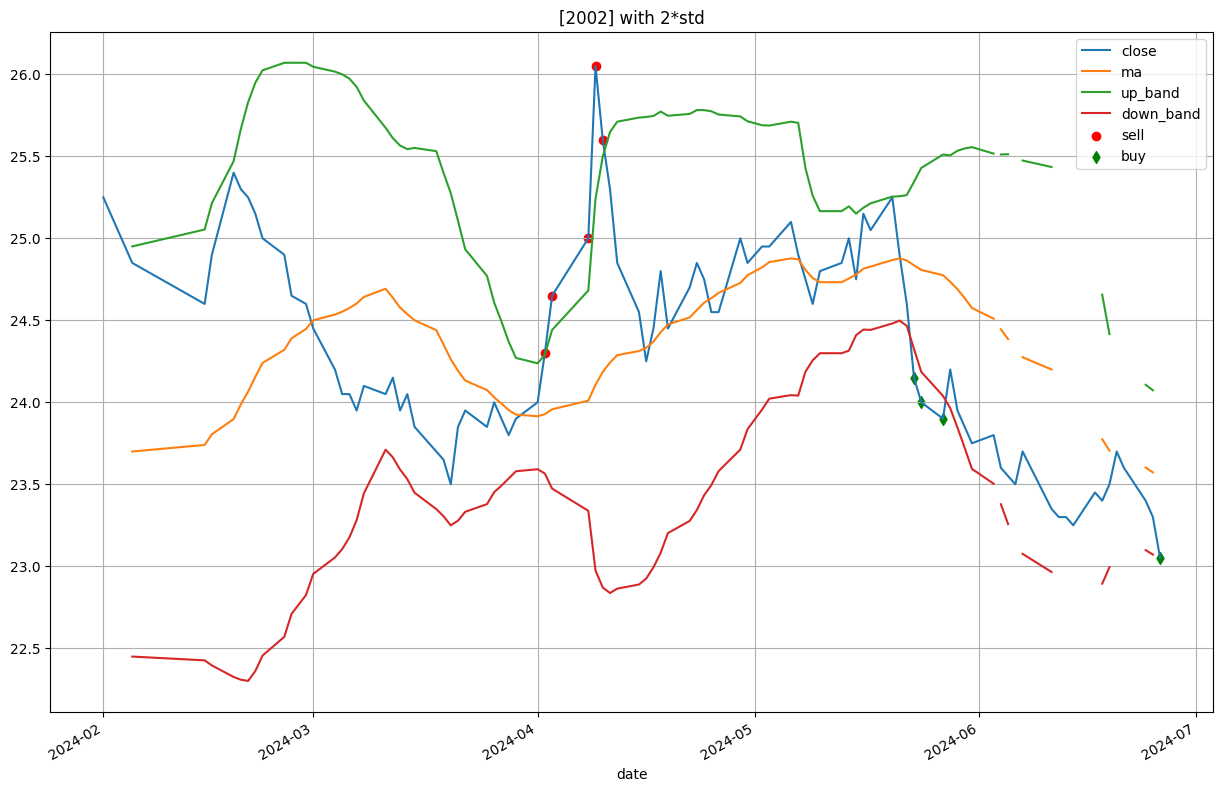

In [21]:
# pip install twstock pandas matplotlib
#use 布林通道(B-Band) to predict stock
%pylab inline
import twstock
import pandas as pd

n_day_ma = 20

df['ma'] = df['close'].rolling(window=n_day_ma).mean()
df['std'] = df['close'].rolling(window=n_day_ma).std()
df['up_band'] = df['ma']+df['std']*2
df['down_band'] = df['ma']-df['std']*2

# 買點
chk_b1 = df['close']<df['down_band']
b1 = df[chk_b1]
print('buy point:', len(b1))
#b1

# 賣點
chk_s1 = df['close']>df['up_band']
s1 = df[chk_s1]
print('sell point:', len(s1))
#s1

df[['close', 'ma', 'up_band', 'down_band']].plot(grid = True, figsize=[15,10])

# 點出買賣點
l1 = plt.scatter(s1.index, s1['close'], marker='o', color='red', label='sell')
l2 = plt.scatter(b1.index, b1['close'], marker='d', color='green', label='buy')

plt.title('[%s] with 2*std' %(stock.sid))
plt.legend()

plt.show()

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
buy point: 10
sell point: 9


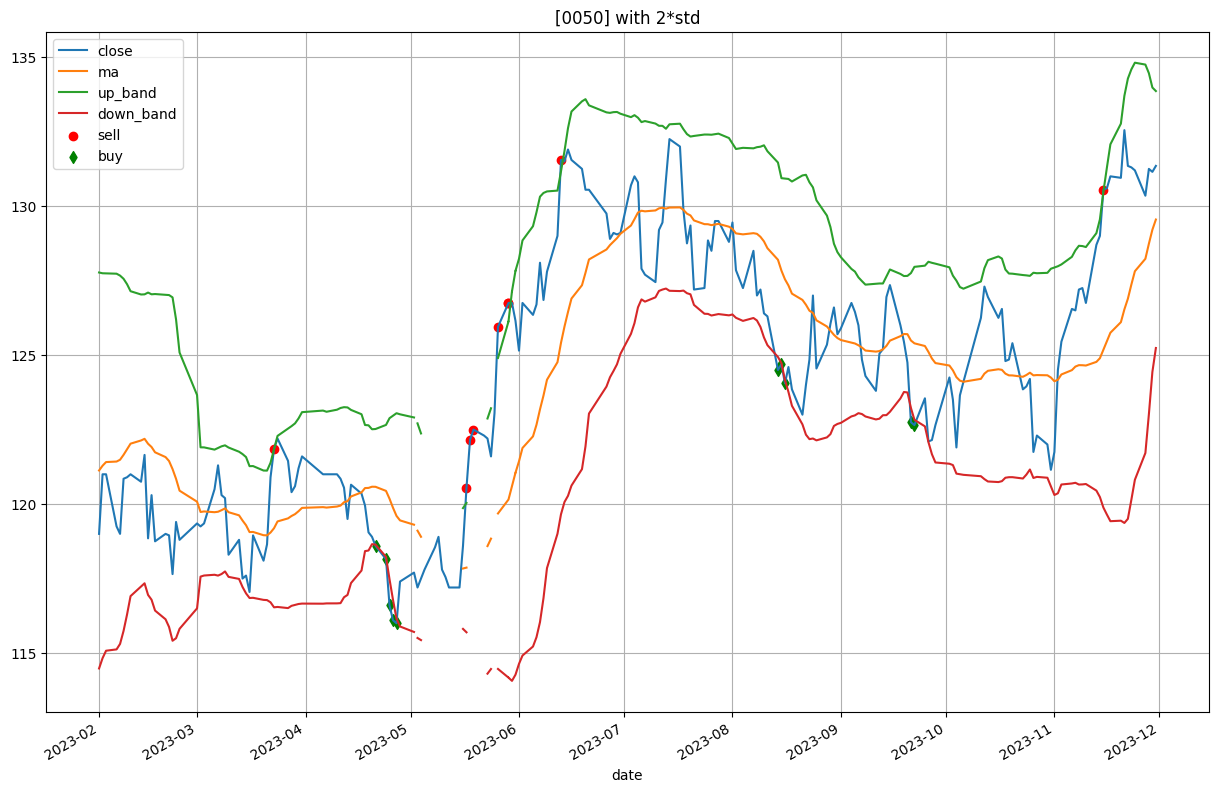

In [22]:
%pylab inline
import twstock
import pandas as pd

stock = twstock.Stock('0050')
data = stock.fetch(2023, 5)
df = pd.DataFrame.from_dict(data)

for m in range(2, 12):
    data = stock.fetch(2023, m)
    df_tmp = pd.DataFrame.from_dict(data)
    #df = df.append(df_tmp)
    df = pd.concat([df, df_tmp], ignore_index=True)
df = df.set_index('date')

# pip install twstock pandas matplotlib
%pylab inline
import twstock
import pandas as pd

n_day_ma = 20

df['ma'] = df['close'].rolling(window=n_day_ma).mean()
df['std'] = df['close'].rolling(window=n_day_ma).std()
df['up_band'] = df['ma']+df['std']*2
df['down_band'] = df['ma']-df['std']*2

# 買點
chk_b1 = df['close']<df['down_band']
b1 = df[chk_b1]
print('buy point:', len(b1))
#b1

# 賣點
chk_s1 = df['close']>df['up_band']
s1 = df[chk_s1]
print('sell point:', len(s1))
#s1

df[['close', 'ma', 'up_band', 'down_band']].plot(grid = True, figsize=[15,10])

# 點出買賣點
l1 = plt.scatter(s1.index, s1['close'], marker='o', color='red', label='sell')
l2 = plt.scatter(b1.index, b1['close'], marker='d', color='green', label='buy')

plt.title('[%s] with 2*std' %(stock.sid))
plt.legend()

plt.show()